## Workflow for Design of Experiment: Screening of Factors + Factorial Design

#### Concept:
* Full-factorial design is a systematic method used in experiments where all possible combinations of factors and their levels are considered. Here, you have 3 factors, each with 2 levels (often -1 and +1, representing low and high levels respectively). The number of experiments in a full-factorial design is calculated as LFLF, where LL is the number of levels and FF is the number of factors. For 3 factors with 2 levels each, there will be 23=823=8 experiments.

In [5]:
# Import Dependencies
import numpy as np
import pandas as pd
from pyDOE2 import *
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from IPython.display import display, HTML
import plotly.graph_objs as go

### Screeing - 2 levels 

#### Create the Design matrix for 3 Factors and 2 Levels

* for 3 Factors and 2 Levels, the number of experiments will be 8 (L^F or 2^3 experiments)


    * ff2n(3): This function is used to generate the design matrix for a full-factorial experiment. It's likely part of a statistical or experimental design library. The argument 3 signifies that there are three factors.

    * pd.DataFrame(design): Converts the design matrix into a Pandas DataFrame for easier manipulation and visualization.

In [45]:
#Creating the Design Matrix
design = ff2n(3) #fullfact([2,2,2])
design_table = pd.DataFrame(design)
#design_table

In [28]:
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=design_table[0], y=design_table[1], z=design_table[2], mode='markers',
    marker=dict(size=5, opacity=0.8,),
    text=[f'Factor1: {x}, Factor2: {y}, Factor3: {z}' for x, y, z in zip(design_table[0], design_table[1], design_table[2])]
)])

# Update layout
fig.update_layout(
    title='2-Level Full-Factorial Design Points',
    scene = dict(
        xaxis_title='Factor1',
        yaxis_title='Factor2',
        zaxis_title='Factor3')
)

fig.show()

# Renames the columns of the design_table DataFrame for clarity, changing them from 0, 1, 2 to "Factor_1", "Factor_2", and "Factor_3".
design_table.rename(columns={0:"Factor_1", 1:"Factor_2", 2:"Factor_3"}, inplace=True)
design_table

,Factor_1,Factor_2,Factor_3
0,-1.0,-1.0,-1.0
1,1.0,-1.0,-1.0
2,-1.0,1.0,-1.0
3,1.0,1.0,-1.0
4,-1.0,-1.0,1.0
5,1.0,-1.0,1.0
6,-1.0,1.0,1.0
7,1.0,1.0,1.0


### Add columns that represent interaction between Factors

#### Interaction: 
* In the context of factorial experiments, an interaction between factors occurs when the effect of one factor on the response variable is different at different levels of another factor. In simpler terms, it's when the combined effect of two or more factors is not just their individual effects added together.

    * These lines create new columns in the design_table DataFrame, each representing an interaction between different sets of factors.
    * Factor_1_2: Represents the interaction between Factor 1 and Factor 2.
    * Factor_1_3: Represents the interaction between Factor 1 and Factor 3.
    * Factor_2_3: Represents the interaction between Factor 2 and Factor 3.
    * Factor_1_2_3: Represents the three-way interaction between Factor 1, Factor 2, and Factor 3.
    * The interaction is calculated by simply multiplying the values of the factors involved.

In [29]:
# Create new columns by multiplying existing columns
design_table['Factor_1_2'] = design_table['Factor_1'] * design_table['Factor_2']
design_table['Factor_1_3'] = design_table['Factor_1'] * design_table['Factor_3']
design_table['Factor_2_3'] = design_table['Factor_2'] * design_table['Factor_3']
design_table['Factor_1_2_3'] = design_table['Factor_1'] * design_table['Factor_2']* design_table['Factor_3']

design_table

,Factor_1,Factor_2,Factor_3,Factor_1_2,Factor_1_3,Factor_2_3,Factor_1_2_3
0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
1,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
3,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
5,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
6,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Setting up your experimental table

* Defining Factor Values

* Create the Experimental table that will be used in the _wet-_ laboratory

    * The DataFrame is saved as a CSV file named "Experimental Table from DoE - screening 3F 2L.csv". The sep=";" specifies that the separator used in the file is a semicolon. index=False ensures that the DataFrame index is not included in the CSV file.

In [30]:
# Defining Factor Values
Factor_1 = [10, 20, 30]  # Values for Factor 1
Factor_2 = [4.2, 7, 9.8]  # Values for Factor 2
Factor_3 = [0.5, 1, 1.5]  # Values for Factor 3

# Mapping for each factor
mapping_factor_1 = {-1: min(Factor_1), 0: sum(Factor_1)/len(Factor_1), 1: max(Factor_1)}
mapping_factor_2 = {-1: min(Factor_2), 0: sum(Factor_2)/len(Factor_2), 1: max(Factor_2)}
mapping_factor_3 = {-1: min(Factor_3), 0: sum(Factor_3)/len(Factor_3), 1: max(Factor_3)}

# Assuming 'design_table' is the DataFrame with -1, 0, and +1 (ex. box_behnken design)
exp_table = design_table.copy()

exp_table.iloc[:, 0] = exp_table.iloc[:, 0].map(mapping_factor_1)
exp_table.iloc[:, 1] = exp_table.iloc[:, 1].map(mapping_factor_2)
exp_table.iloc[:, 2] = exp_table.iloc[:, 2].map(mapping_factor_3)

exp_table['Results'] = exp_table.apply(lambda _: '', axis=1)

# Sort columns
exp_table["Experiment#"] = exp_table.index
exp_table = exp_table[['Experiment#', 'Factor_1', 'Factor_2', 'Factor_3', 'Results']].iloc[:8]

# Display the modified DataFrame
#display(exp_table)

exp_table.to_csv("Experimental Table from DoE - screening 3F 2L.csv", sep=";", index=False)
print(f"Your experimental table is ready as a CSV file for use.")

Your experimental table is ready as a CSV file for use.


### Add results from the experiments

* This adds a new column Results to design_table, containing the results from the experiments.

In [32]:
#results = pd.read_csv("results.csv")

B0 = np.ones(len(design_table))
design_table["B0"] = B0
  
# List of new values
results_list = [0.36, 0.81, 0.48, 0, 0, 0.49, 0, 0]

design_table['Results'] = results_list

#display(design_table)

### Calculate the effects for each Factor

* Multiplies each value in the DataFrame (excluding the Results column) with the corresponding value in the Results column. This is typically done to analyze the effect of each factor and interaction term on the results.

* Sums up the products for each column and then divides by 4. The division by 4 is specific to this experimental setup and might relate to the normalization or scaling of the results.

* This section also creates a bar plot to visualize the sum of products for each column (factor or interaction term). This helps in understanding the relative contribution of each factor or interaction term to the experimental results.

___
#### Understanding Average Effects:
* Magnitude and Direction: The average effect of each factor (and their interactions) indicates how much and in which direction (positive or negative) the factor influences the outcome. A large absolute value suggests a strong effect.
* Positive vs Negative Effects: Positive values indicate that higher levels of the factor increase the response, while negative values suggest the opposite.


* _Comparing Effects:_
    * Relative Magnitude: Compare the magnitude of effects across factors to understand which factors are most influential.
    * Interactions: Pay attention to interaction terms (e.g., Factor_1_2). Significant interactions imply that the effect of one factor depends on the level of another.

* _Contextual Relevance:_
    * Practical Significance: Consider the practical implications of each factor's effect. Even if statistically significant, an effect might not be practically important.

,Factor_1,Factor_2,Factor_3,Factor_1_2,Factor_1_3,Factor_2_3,Factor_1_2_3,B0,Results
0,-1.000,-1.000,-1.00,1.000,1.00,1.00,-1.00,1.000,0.36
1,1.000,-1.000,-1.00,-1.000,-1.00,1.00,1.00,1.000,0.81
2,-1.000,1.000,-1.00,-1.000,1.00,-1.00,1.00,1.000,0.48
3,1.000,1.000,-1.00,1.000,-1.00,-1.00,-1.00,1.000,0.00
4,-1.000,-1.000,1.00,1.000,-1.00,-1.00,1.00,1.000,0.00
5,1.000,-1.000,1.00,-1.000,1.00,-1.00,-1.00,1.000,0.49
6,-1.000,1.000,1.00,-1.000,-1.00,1.00,-1.00,1.000,0.00
7,1.000,1.000,1.00,1.000,1.00,1.00,1.00,1.000,0.00
Sum_of_Products,0.115,-0.295,-0.29,-0.355,0.13,0.05,0.11,0.535,NaN


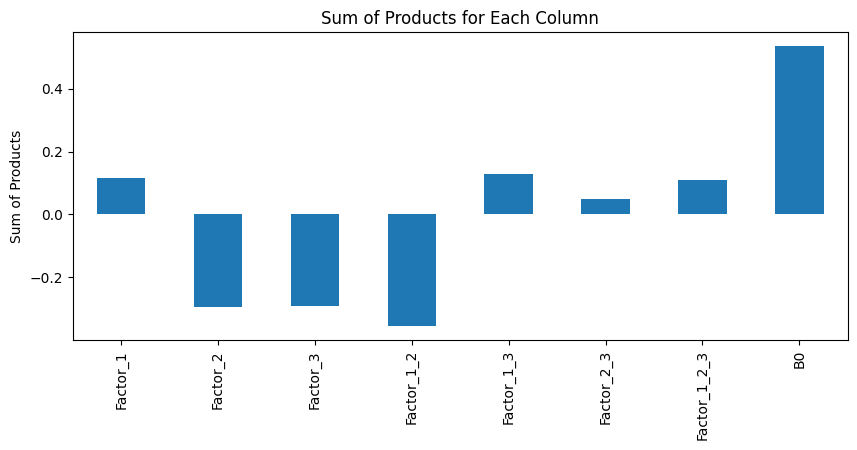

In [33]:
# Multiply each column by the 'Results' column
products = design_table.drop('Results', axis=1).multiply(design_table['Results'], axis='index')

# Sum these products for each column
column_sums = products.sum() /4

# Append the sums as a new row to your DataFrame
design_table.loc['Sum_of_Products'] = column_sums

display(design_table)

# Extract the 'Sum_of_Products' row
sum_of_products = design_table.loc['Sum_of_Products']

# Exclude 'Results' column if it's in the same DataFrame
if 'Results' in sum_of_products:
    sum_of_products = sum_of_products.drop('Results')

# Create a bar plot
plt.figure(figsize=(10, 4))
sum_of_products.plot(kind='bar')
plt.title('Sum of Products for Each Column')
plt.ylabel('Sum of Products'); #plt.xlabel('Factors')
plt.show()

In [34]:
# Extract the 'Sum_of_Products' row
sum_of_products = design_table.loc['Sum_of_Products']

# Calculate the square root of the square of each value
sqrt_of_squares = np.sqrt(sum_of_products**2)

# Add this as a new row to the DataFrame
design_table.loc['Sqrt_of_Squares'] = sqrt_of_squares

# Display the updated DataFrame
display(design_table)

,Factor_1,Factor_2,Factor_3,Factor_1_2,Factor_1_3,Factor_2_3,Factor_1_2_3,B0,Results
0,-1.000,-1.000,-1.00,1.000,1.00,1.00,-1.00,1.000,0.36
1,1.000,-1.000,-1.00,-1.000,-1.00,1.00,1.00,1.000,0.81
2,-1.000,1.000,-1.00,-1.000,1.00,-1.00,1.00,1.000,0.48
3,1.000,1.000,-1.00,1.000,-1.00,-1.00,-1.00,1.000,0.00
4,-1.000,-1.000,1.00,1.000,-1.00,-1.00,1.00,1.000,0.00
5,1.000,-1.000,1.00,-1.000,1.00,-1.00,-1.00,1.000,0.49
6,-1.000,1.000,1.00,-1.000,-1.00,1.00,-1.00,1.000,0.00
7,1.000,1.000,1.00,1.000,1.00,1.00,1.00,1.000,0.00
Sum_of_Products,0.115,-0.295,-0.29,-0.355,0.13,0.05,0.11,0.535,NaN
Sqrt_of_Squares,0.115,0.295,0.29,0.355,0.13,0.05,0.11,0.535,NaN


#### Calculating Average Effects
   * For each column, it calculates the sum of the results where the factor level is 1 (positive level) and the sum where it's -1 (negative level).
   * The average effect is computed as the difference between the average of positive level results and the average of negative level results.
   * Calculates the percentage of each factor's effect relative to the effect of B0 (the baseline or constant term).

In [36]:
# Columns to check
columns_to_check = ["Factor_1", "Factor_2", "Factor_3", "Factor_1_2", "Factor_1_3", "Factor_2_3", "Factor_1_2_3", "B0"]

# Dictionary to store the results
average_effects = {}

# Calculate the average effect for each column
for col in columns_to_check:
    sum_positive = design_table.loc[design_table[col] == 1, 'Results'].sum()
    sum_negative = design_table.loc[design_table[col] == -1, 'Results'].sum()
    average_effects[col] = (sum_positive / 2) - (sum_negative / 2)

# Convert the dictionary to a DataFrame for better visualization
average_effects_df = pd.DataFrame(list(average_effects.items()), columns=['Factor', 'Average Effect'])

# Calculate the percentage relative to B0
b0_effect = average_effects['B0']
average_effects_df['Percentage of B0'] = average_effects_df['Average Effect'] / b0_effect * 100

# Display the results DataFrame
display(average_effects_df)

,Factor,Average Effect,Percentage of B0
0,Factor_1,0.23,21.495327
1,Factor_2,-0.59,-55.140187
2,Factor_3,-0.58,-54.205607
3,Factor_1_2,-0.71,-66.355140
4,Factor_1_3,0.26,24.299065
5,Factor_2_3,0.10,9.345794
6,Factor_1_2_3,0.22,20.560748
7,B0,1.07,100.000000


##### Pareto plot to analyse the Average Effect
* Creates a bar plot showing the average effect of each factor. The bars represent the size of the effect (positive or negative) for each factor.
* Adds a line plot on a secondary axis (right y-axis) to show the cumulative percentage. This helps in visualizing both the individual effects and their cumulative contribution.
___
#### Interpreting the Pareto Plot

_Understanding the Plot Components:_
* Bars: Represent the average effect of each factor (or interaction). The length of the bar indicates the magnitude of the effect.
* Line Plot: Shows the cumulative percentage of the total effect attributed to the factors, in descending order of their absolute effects.

_Applying the Pareto Principle:_
* 80/20 Rule: Often, a small number of factors (around 20%) will account for the majority (around 80%) of the effect. This is the Pareto Principle or the 80/20 rule.
* Identify Key Factors: The first few factors in the plot (those with the longest bars) are typically the most significant. Focus on these for impactful results.

_Analyzing Cumulative Impact:_
* Cumulative Line: Observe where the cumulative line reaches significant percentages (like 50%, 80%). Factors before these points are your key influencers.
* Steepness of the Curve: A steeper initial slope indicates that a few factors have a large effect, while a more gradual slope suggests a more even distribution of effects.

_Decision Making:_
* Prioritization: Use the plot to prioritize factors for optimization, further investigation, or resource allocation.
* Strategic Interventions: Focus on factors that contribute most significantly to the response for more effective improvements or problem-solving.


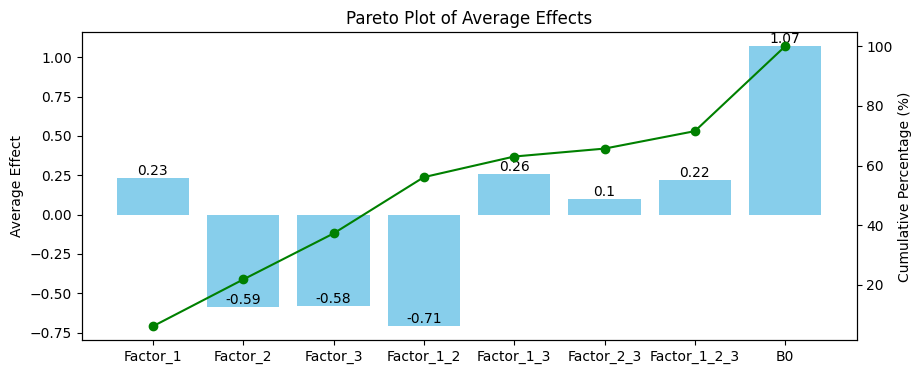

In [37]:
# Sort the DataFrame by the absolute values of 'Average Effect' in descending order
average_effects_df['Absolute Effect'] = average_effects_df['Average Effect'].abs()
#average_effects_df.sort_values(by='Absolute Effect', ascending=False, inplace=True)

# Calculate the cumulative percentage
cumulative_percentage = average_effects_df['Absolute Effect'].cumsum() / average_effects_df['Absolute Effect'].sum() * 100

# Create a bar plot
fig, ax1 = plt.subplots(figsize=(10, 4))
bars = ax1.bar(average_effects_df['Factor'], average_effects_df['Average Effect'], color='skyblue')

# Add a line plot for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(average_effects_df['Factor'], cumulative_percentage, color='green', marker='o')

#ax1.set_xlabel('Factors')
ax1.set_ylabel('Average Effect')
ax2.set_ylabel('Cumulative Percentage (%)')
plt.title('Pareto Plot of Average Effects')

# Adding the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Show plot
plt.show()

Things to Keep in Mind

* Contextual Fit: Always interpret the results within the context of your specific experiment and its objectives.
* Data Quality: Ensure that the experimental data is reliable and the experimental design was appropriately conducted.
* Statistical Significance: The Pareto plot and average effects provide a descriptive view. For inferential conclusions, consider conducting a statistical significance test.

### Once the user define which Factor has the lower effect, this can be excluded

* in this example: Factor 1

* So, users must select a value for Factor 1 and keep it fixed during the next steps

___

### Factorial Design - 2 Factors and 3 levels

#### Create the Design matrix for 2 Factors and 3 Levels

* for 2 Factors and 3 Levels, the number of experiments will be 9 (L^F or 3^2 experiments)

* Factor 1 (the factor excluded for this next step), must be kept fixed through out this next step

* Note that some of the experiments from the screening step are present in this step

___
#### Creating the Full-Factorial Design:

* fullfact([3,3]): This function call generates a full-factorial design. The argument [3,3] indicates that there are two factors, each with 3 levels. In full-factorial design terminology, this would be a 3x3 factorial design, resulting in 3² = 9 experimental runs.


In [38]:
design_ffact = fullfact([3,3])

design_ffact = pd.DataFrame(design_ffact)

design_table_ffact = design_ffact.replace({0: -1, 1: 0, 2: 1})
design_table_ffact.rename(columns={0:"Factor_1", 1:"Factor_2"}, inplace=True)
design_table_ffact

,Factor_1,Factor_2
0,-1.0,-1.0
1,0.0,-1.0
2,1.0,-1.0
3,-1.0,0.0
4,0.0,0.0
5,1.0,0.0
6,-1.0,1.0
7,0.0,1.0
8,1.0,1.0


### Setting up your experimental table

* Defining Factor Values

* Create the Experimental table that will be used in the _wet-_ laboratory

    * The DataFrame is saved as a CSV file named "Experimental Table from DoE - screening 3F 2L.csv". The sep=";" specifies that the separator used in the file is a semicolon. index=False ensures that the DataFrame index is not included in the CSV file.

In [39]:
### Setting up your experimental table

Factor_1 = [10, 20, 30]  # Values for Factor 1
Factor_2 = [4.2, 7, 9.8]  # Values for Factor 2

# Mapping for each factor
mapping_factor_1 = {-1: min(Factor_1), 0: sum(Factor_1)/len(Factor_1), 1: max(Factor_1)}
mapping_factor_2 = {-1: min(Factor_2), 0: sum(Factor_2)/len(Factor_2), 1: max(Factor_2)}

# Assuming 'design_table' is the DataFrame with -1, 0, and +1 (ex. box_behnken design)
exp_table_ffact = design_table_ffact.copy()

exp_table_ffact.iloc[:, 0] = exp_table_ffact.iloc[:, 0].map(mapping_factor_1)
exp_table_ffact.iloc[:, 1] = exp_table_ffact.iloc[:, 1].map(mapping_factor_2)

exp_table_ffact['Results'] = exp_table_ffact.apply(lambda _: '', axis=1)

# Sort columns
exp_table_ffact["Experiment#"] = exp_table_ffact.index
exp_table_ffact = exp_table_ffact[['Experiment#', 'Factor_1', 'Factor_2', 'Results']].iloc[:8]

# Display the modified DataFrame
#display(exp_table_ffact)

exp_table_ffact.to_csv("Experimental Table from DoE - Full Factorial 3F 2L.csv", sep=";", index=False)
print(f"Your experimental table is ready as a CSV file for use.")

Your experimental table is ready as a CSV file for use.


### Add results from the experiments

* This adds a new column Results to design_table, containing the results from the experiments.

In [40]:
B0 = np.ones(len(design_ffact))
design_table_ffact["B0"] = B0

# Create new columns by multiplying existing columns
design_table_ffact['Factor_1_2'] = design_table_ffact['Factor_1'] * design_table_ffact['Factor_2']
design_table_ffact['Factor_1_1'] = design_table_ffact['Factor_1'] * design_table_ffact['Factor_1']
design_table_ffact['Factor_2_2'] = design_table_ffact['Factor_2'] * design_table_ffact['Factor_2']

#results_list2 = pd.read_csv("results.csv")

# List of new values

results_list_2 = [0.38, 0.81, 0.88, 0, 0, 0, 0, 0, 0]

design_table_ffact['Results'] = results_list_2

design_table_ffact

,Factor_1,Factor_2,B0,Factor_1_2,Factor_1_1,Factor_2_2,Results
0,-1.0,-1.0,1.0,1.0,1.0,1.0,0.38
1,0.0,-1.0,1.0,-0.0,0.0,1.0,0.81
2,1.0,-1.0,1.0,-1.0,1.0,1.0,0.88
3,-1.0,0.0,1.0,-0.0,1.0,0.0,0.00
4,0.0,0.0,1.0,0.0,0.0,0.0,0.00
5,1.0,0.0,1.0,0.0,1.0,0.0,0.00
6,-1.0,1.0,1.0,-1.0,1.0,1.0,0.00
7,0.0,1.0,1.0,0.0,0.0,1.0,0.00
8,1.0,1.0,1.0,1.0,1.0,1.0,0.00


#### After completing the screening phase, moving on to a full factorial design with three levels is a great next step. In a full factorial design, every possible combination of factors and levels is tested. 

* We don´t need to calculate effects in this step

* A full factorial design with three levels is a comprehensive approach that allows you to explore the effects of each factor thoroughly and understand their interactions. It's a powerful method in experimental design, especially when you need detailed insights into the relationships between multiple variables.

In [41]:
# Extracting y-values (dependent variable) and x-values (independent variables)
y = design_table_ffact[['Results']].values
X = design_table_ffact[["Factor_1", "Factor_2", "Factor_1_2", "Factor_1_1", "Factor_2_2"]].values

# Add a column of ones to X to include an intercept in the model
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Perform linear regression
coefficients, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)

# The standard error (square root of the diagonal of the covariance matrix)
standard_error = np.sqrt(residuals / (len(y) - len(coefficients)))

# Accessing the sixth element (note: Python is zero-indexed, so it's the fifth element in Python)
# In case of multiple regression, you might need to adjust the index based on the output structure
sixth_element = standard_error[0] if len(standard_error) > 0 else None

#display(coefficients)

### Creating the Response Surface matrix

* Creating a Response Surface matrix involves setting up a framework where you can later input the responses (or outcomes) of your experiments based on varying levels of two factors. The code you've provided sets up such a matrix with values ranging from -1 to 1 (representing the factor levels) and divides this range into 11 steps.

* When you run Resp_surf_ffact, it will display an 11x11 grid. Initially, all cells are filled with zeros. This matrix serves as a template where you can input the results of your experiments. Each cell corresponds to a combination of factor levels (one level from the horizontal axis and one from the vertical axis).

In [47]:
# This creates a linearly spaced vector of 11 points between -1 and 1. These points represent the levels of your factors in the response surface matrix.
vector = np.linspace(-1, 1, 11)

# Create an 11x11 DataFrame with zeros (or any default value)
Resp_surf_ffact = pd.DataFrame(np.zeros((12, 12)))

# Set the headers and index with the same vector values
Resp_surf_ffact.columns = [''] + list(vector)
Resp_surf_ffact.index = [''] + list(vector)
Resp_surf_ffact = Resp_surf_ffact.iloc[1:]
Resp_surf_ffact = Resp_surf_ffact.iloc[:, 1:]
#Resp_surf_ffact

Ensure that the coefficients array is defined with the appropriate values. This array should contain six elements representing the constant term, the linear coefficients, the interaction coefficient, and the quadratic coefficients.

In [43]:
Resp_surf_ffact2 = Resp_surf_ffact

# Populate the DataFrame
for i in range(11):  # Skip the first row and column
    for j in range(11):
        x = Resp_surf_ffact2.columns[j]  # Corresponding vector value for the column
        y = Resp_surf_ffact2.index[i]    # Corresponding vector value for the row
        # Apply the formula
        Resp_surf_ffact2.iloc[i, j] = (coefficients[0] + coefficients[1]*x + coefficients[2]*y +
                                coefficients[3]*x*y + coefficients[4]*x*x + coefficients[5]*y*y)

# Display the updated DataFrame
display(Resp_surf_ffact2)

,-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0
-1.0,0.461667,0.524933,0.5834,0.637067,0.685933,0.7300,0.769267,0.803733,0.8334,0.858267,0.878333
-0.8,0.293467,0.351733,0.4052,0.453867,0.497733,0.5368,0.571067,0.600533,0.6252,0.645067,0.660133
-0.6,0.152867,0.206133,0.2546,0.298267,0.337133,0.3712,0.400467,0.424933,0.4446,0.459467,0.469533
-0.4,0.039867,0.088133,0.1316,0.170267,0.204133,0.2332,0.257467,0.276933,0.2916,0.301467,0.306533
-0.2,-0.045533,-0.002267,0.0362,0.069867,0.098733,0.1228,0.142067,0.156533,0.1662,0.171067,0.171133
0.0,-0.103333,-0.065067,-0.0316,-0.002933,0.020933,0.0400,0.054267,0.063733,0.0684,0.068267,0.063333
0.2,-0.133533,-0.100267,-0.0718,-0.048133,-0.029267,-0.0152,-0.005933,-0.001467,-0.0018,-0.006933,-0.016867
0.4,-0.136133,-0.107867,-0.0844,-0.065733,-0.051867,-0.0428,-0.038533,-0.039067,-0.0444,-0.054533,-0.069467
0.6,-0.111133,-0.087867,-0.0694,-0.055733,-0.046867,-0.0428,-0.043533,-0.049067,-0.0594,-0.074533,-0.094467
0.8,-0.058533,-0.040267,-0.0268,-0.018133,-0.014267,-0.0152,-0.020933,-0.031467,-0.0468,-0.066933,-0.091867


### Creating a 3D surface plot from the data in your Response Surface matrix
* This type of plot is particularly useful for visualizing the relationship between two factors and a response variable in a clear, intuitive manner.

#### Interpretation: 
* The plot visually represents how changes in 'Factor_1' and 'Factor_2' together affect the yield (response variable). Peaks and valleys in the surface indicate combinations of factor levels that result in high and low yields, respectively.

#### Optimization: 
* This kind of plot can be used to identify optimal combinations of factor levels for maximizing or minimizing the response variable.

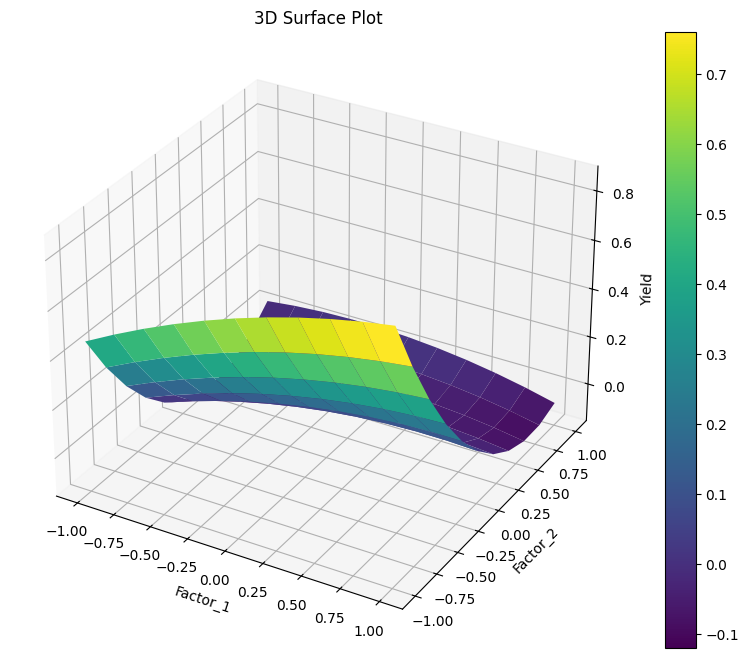

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Create coordinate arrays for the x and y values
X, Y = np.meshgrid(Resp_surf_ffact2.columns.astype(float), Resp_surf_ffact2.index.astype(float))

# Get the z values from the DataFrame and handle NaN or infinite values
Z = Resp_surf_ffact2.values
Z = np.nan_to_num(Z)  # Replace NaN with 0 and infinite with large finite numbers

# Ensure all arrays are of numeric type
X, Y, Z = [np.array(arr, dtype=float) for arr in [X, Y, Z]]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot a surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('Factor_1')
ax.set_ylabel('Factor_2')
ax.set_zlabel('Yield')
ax.set_title('3D Surface Plot')

# Add a color bar
fig.colorbar(surf)

plt.show()

In [46]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Assuming Resp_surf2 is your DataFrame

# Create coordinate arrays for the x and y values
X, Y = np.meshgrid(Resp_surf_ffact2.columns.astype(float), Resp_surf_ffact2.index.astype(float))

# Get the z values from the DataFrame
Z = Resp_surf_ffact2.values

# Create a Plotly 3D surface plot
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, contours_z=dict(
    show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))])

# Update the layout
fig.update_layout(
    title='3D Surface Plot with Projections',
    scene=dict(
        xaxis_title='Factor_1',
        yaxis_title='Factor_1',
        zaxis_title='Intensity'
    ),
    autosize=False,
    width=800,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90)
)

# Show the plot
fig.show()
